In [208]:
import pandas as pd

In [209]:
#importing the dataset as a dataframe
df = pd.read_csv("results.csv")

In [210]:
#displaying the first few rows
df.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1680932910063,547,HTTP Request,200,OK,Thread Group 1-1,text,True,NaN,17790,116,1,1,https://www.google.com/,531,0,86
1,1680932911077,556,HTTP Request,200,OK,Thread Group 1-2,text,True,NaN,17809,116,1,1,https://www.google.com/,540,0,69
2,1680932912063,604,HTTP Request,200,OK,Thread Group 1-3,text,True,NaN,17816,116,1,1,https://www.google.com/,590,0,117
3,1680932913062,534,HTTP Request,200,OK,Thread Group 1-4,text,True,NaN,17775,116,1,1,https://www.google.com/,534,0,68
4,1680932914064,733,HTTP Request,200,OK,Thread Group 1-5,text,True,NaN,17788,116,1,1,https://www.google.com/,724,0,255


In [211]:
#Viewing the last few rows
df.tail()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
96,1680933005063,1744,HTTP Request,200,OK,Thread Group 1-96,text,True,NaN,17865,116,1,1,https://www.google.com/,1700,0,161
97,1680933007062,689,HTTP Request,200,OK,Thread Group 1-98,text,True,NaN,17770,116,1,1,https://www.google.com/,689,0,198
98,1680933008063,649,HTTP Request,200,OK,Thread Group 1-99,text,True,NaN,17758,116,1,1,https://www.google.com/,615,0,143
99,1680933009064,621,HTTP Request,200,OK,Thread Group 1-100,text,True,NaN,17818,116,2,2,https://www.google.com/,594,0,125
100,1680933010065,672,HTTP Request,200,OK,Thread Group 1-101,text,True,NaN,17827,116,2,2,https://www.google.com/,672,0,130


In [212]:
pd.options.mode.chained_assignment = None  # default='warn'
df["user_num"] = 0
for i in range(0,len(df)):
     df["user_num"][i] = i + 1

In [213]:
df

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,user_num
0,1680932910063,547,HTTP Request,200,OK,Thread Group 1-1,text,True,NaN,17790,116,1,1,https://www.google.com/,531,0,86,1
1,1680932911077,556,HTTP Request,200,OK,Thread Group 1-2,text,True,NaN,17809,116,1,1,https://www.google.com/,540,0,69,2
2,1680932912063,604,HTTP Request,200,OK,Thread Group 1-3,text,True,NaN,17816,116,1,1,https://www.google.com/,590,0,117,3
3,1680932913062,534,HTTP Request,200,OK,Thread Group 1-4,text,True,NaN,17775,116,1,1,https://www.google.com/,534,0,68,4
4,1680932914064,733,HTTP Request,200,OK,Thread Group 1-5,text,True,NaN,17788,116,1,1,https://www.google.com/,724,0,255,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1680933005063,1744,HTTP Request,200,OK,Thread Group 1-96,text,True,NaN,17865,116,1,1,https://www.google.com/,1700,0,161,97
97,1680933007062,689,HTTP Request,200,OK,Thread Group 1-98,text,True,NaN,17770,116,1,1,https://www.google.com/,689,0,198,98
98,1680933008063,649,HTTP Request,200,OK,Thread Group 1-99,text,True,NaN,17758,116,1,1,https://www.google.com/,615,0,143,99
99,1680933009064,621,HTTP Request,200,OK,Thread Group 1-100,text,True,NaN,17818,116,2,2,https://www.google.com/,594,0,125,100


In [214]:
df = df[["user_num","elapsed","Connect"]]

In [215]:
df.head()

,user_num,elapsed,Connect
0,1,547,86
1,2,556,69
2,3,604,117
3,4,534,68
4,5,733,255


In [216]:
import matplotlib.pyplot as plt

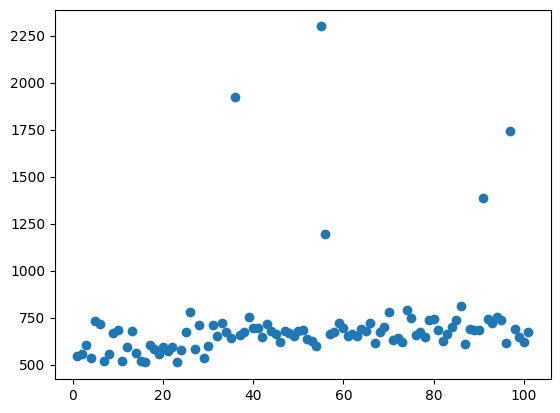

In [263]:
plt.scatter(df["user_num"],df["elapsed"])

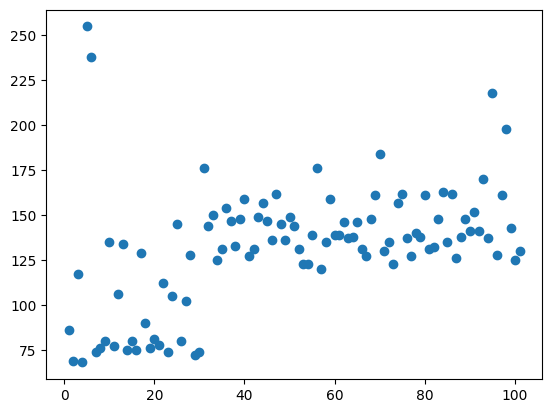

In [275]:
plt.scatter(df["user_num"],df["Connect"])

In [219]:
from sklearn.linear_model import LinearRegression

In [220]:
lr = LinearRegression()

In [276]:
X = df["user_num"]

In [277]:
y = df["Connect"]

In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [279]:
import statsmodels.api as sm
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [280]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const       92.497706
user_num     0.676047
dtype: float64

In [281]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                Connect   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     42.13
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           4.45e-08
Time:                        22:15:44   Log-Likelihood:                -223.11
No. Observations:                  50   AIC:                             450.2
Df Residuals:                      48   BIC:                             454.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.4977      6.411     14.427      0.0

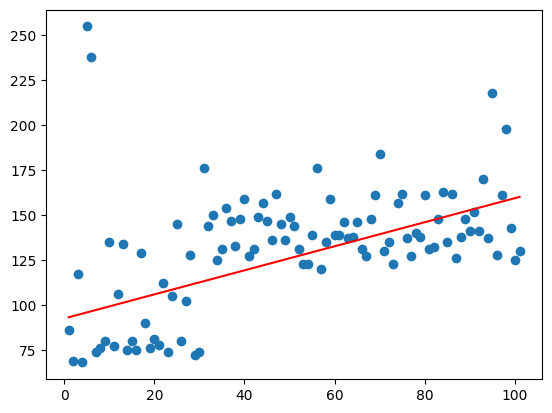

In [306]:
plt.scatter(df["user_num"], df["Connect"])
plt.plot(df["user_num"], 92.49 + 0.67*df["user_num"], 'r')
plt.show()

In [226]:
X_test

84    85
55    56
66    67
67    68
45    46
39    40
22    23
44    45
10    11
0      1
18    19
30    31
97    98
33    34
77    78
4      5
93    94
78    79
12    13
31    32
76    77
89    90
26    27
42    43
70    71
15    16
40    41
72    73
9     10
96    97
11    12
91    92
64    65
28    29
83    84
5      6
47    48
53    54
35    36
16    17
81    82
34    35
7      8
43    44
73    74
27    28
19    20
94    95
25    26
62    63
49    50
Name: user_num, dtype: int64

In [227]:
y_test

84     735
55    1195
66     616
67     672
45     621
39     695
22     511
44     664
10     519
0      547
18     557
30     709
97     689
33     674
77     646
4      733
93     751
78     735
12     677
31     654
76     675
89     686
26     585
42     716
70     632
15     513
40     693
72     621
9      682
96    1744
11     591
91     742
64     677
28     537
83     702
5      713
47     669
53     598
35    1921
16     605
81     626
34     640
7      556
43     676
73     789
27     711
19     594
94     739
25     779
62     651
49     679
Name: elapsed, dtype: int64